## Hypothesis 3
Spam content has url features not present in non-spam content url links.

## EDA
General url trend in entire dataset.

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import requests

In [85]:
full_df = pd.read_csv("../data/processed/full_df.csv")

In [86]:
def count_urls(text):
    if not isinstance(text, str):
        return 0
    # Add re.IGNORECASE
    url_pattern = re.compile(r'(?:https?://|www\.)\S+', re.IGNORECASE)
    urls_found = url_pattern.findall(text)
    return len(urls_found)

def url_list(text):
    if not isinstance(text, str):
        # Return an empty list for consistency, not 0
        return []
    # Add re.IGNORECASE
    url_pattern = re.compile(r'(?:https?://|www\.)\S+', re.IGNORECASE)
    urls_found = url_pattern.findall(text)
    return urls_found


In [87]:
full_df['url_count'] = full_df['body'].apply(count_urls)
full_df['url_list'] = full_df['body'].apply(url_list)
full_df.sample(2)

,body,cleaned_body,label,pos_tags,percentage_vb_dt_nn,percentage_vb_jj_nn,percentage_nn_md_vb,tokens,url_count,url_list
5435,"Subject: re : enron case study update wow ! all on the same day . that ' s super . thank you so very much . vince is coming up to baylor on monday of next week and we will hash out our question list then . thanks john at 04 : 54 pm 11 / 6 / 00 - 0600 , you wrote : > good afternoon john , > > i just want to drop you a line to update you re : andy fastow . i have > confirmed a one hour interview slot with mr . fastow in monday , december 4 th > from > 11 : 00 a . m . - noon . this is in addition to your schedule interviews with > mr . lay and mr . skilling - outline below . > > if you have any questions , please do not hesitate to contact me at > 713 - 853 - 5670 . > > regards , > > cindy > > > - - - - - forwarded by cindy derecskey / corp / enron on 11 / 06 / 2000 04 : 49 pm - - - - - > > cindy > derecskey to : "" john martin "" > cc : vince j kaminski / hou / ect @ ect , christie patrick / hou / ect @ ect > 10 / 31 / 2000 subject : re : enron case study ( document link : cindy derecskey ) > 01 : 44 pm > > > > > > good afternoon john , > > i hope things are well with you . i am writing to update you on the status > of your meetings with andy fastow , ken lay and jeff skilling . i have > arranged the following meeting dates and times with ken lay and jeff > skilling , ( i am still trying to work with andy fastow ' s schedule ) : > > jeff skilling > december 4 th > 2 : 00 - 3 : 00 p . m . > > ken lay > december 4 th > 3 : 30 - 4 : 30 p . m . > > also , i will attempt to schedule the meeting with andy fastow for december > 4 th for convenience - this will also allow us to possibly schedule > additional meetings for the 5 th ( as needed ) . i will let you know as soon > as i ' m successful . > > regards , > > cindy derecskey > university affairs > enron corp . > > > > > john d . martin carr p . collins chair in finance finance department baylor university po box 98004 waco , tx 76798 254 - 710 - 4473 ( office ) 254 - 710 - 1092 ( fax ) j _ martin @ baylor . edu web : http : / / hsb . baylor . edu / html / martinj / home . html",enron case study update wow all on the same day that s super thank you so very much vince is coming up to baylor on monday of next week and we will hash out our question list then thanks john at pm you wrote good afternoon john i just want to drop you a line to update you re andy fastow i have confirmed a one hour interview slot with mr fastow in monday december th from a m noon this is in addition to your schedule interviews with mr lay and mr skilling outline below if you have any questions please do not hesitate to contact me at regards cindy forwarded by cindy derecskey corp enron on pm cindy derecskey to john martin cc vince j kaminski hou ect ect christie patrick hou ect ect subject re enron case study document link cindy derecskey pm good afternoon john i hope things are well with you i am writing to update you on the status of your meetings with andy fastow ken lay and jeff skilling i have arranged the following meeting dates and times with ken lay and jeff skilling i am still trying to work with andy fastow s schedule jeff skilling december th p m ken lay december th p m also i will attempt to schedule the meeting with andy fastow for december th for convenience this will also allow us to possibly schedule additional meetings for the th as needed i will let you know as soon as i m successful regards cindy derecskey university affairs enron corp john d martin carr p collins chair in finance finance department baylor university po box waco tx office fax j martin baylor edu web http hsb baylor edu html martinj home html,0,"['NN', 'NN', 'NN', 'JJ', 'NN', 'DT', 'IN', 'DT', 'JJ', 'NN', 'IN', 'VBZ', 'JJR', 'NN', 'PRP', 'RB', 'RB', 'JJ', 'NN', 'VBZ', 'VBG', 'RP', 'TO', 'VB', 'IN', 'NN', 'IN', 'JJ', 'NN', 'CC', 'PRP', 'MD', 'VB', 'RP', 'PRP$', 'NN', 'NN', 'RB', 'VBZ', 'NN', 'IN', 'NN'

In [88]:
import matplotlib.pyplot as plt

C:\Users\yingo\AppData\Local\Temp\ipykernel_26828\1081376577.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


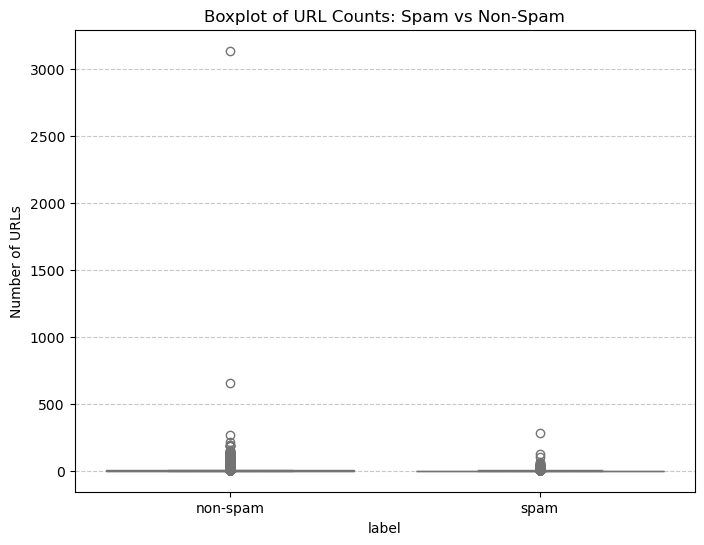

In [89]:
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='label', y='url_count', data=full_df, palette='pastel', hue='label', legend=False)
current_labels_text = [item.get_text() for item in ax.get_xticklabels()]
labels = {'0':'non-spam', '1':'spam'}
new_labels = [labels.get(lbl, lbl) for lbl in current_labels_text]
ax.set_xticklabels(new_labels)
plt.title('Boxplot of URL Counts: Spam vs Non-Spam')
plt.ylabel('Number of URLs')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [90]:
full_df.sort_values(by='url_count', ascending=False).head(5)

body  \
69146  change your settings: http://blo.gs/settings.php\n\nhere is your list of updated weblogs.\n\nOct 04, 2002\n\n 3:03am\n    love-always.net\n      http://love-always.net/\n    Michael's Cyber Journal\n      http://weblog.michaelpark.net/\n    Jesus Christ\n      http://JesusChrist.nelson.org.nz/\n    Roger Jones' Manila Weblog\n      http://radio.weblogs.com/0110495/categories/rogerJonesManilaWeblog/\n    Venezuela\n      http://blogs.salon.com/0001330/categories/venezuela/\n    The Devil's Excrement\n      http://blogs.salon.com/0001330/\n    Life begins at 40, change IS the constant\n      http://pagandenman.blogspot.com/\n    fast fiction\n      http://fastfiction.blogspot.com/\n    A Secular Perspective\n      http://www.bunda.org/writings\n    Neuroprosthesis News\n      http://www.neuroprosthesis.org/blogger.html\n    www.badassgeek.com\n      http://www.badassgeek.com/index.xml\n    Andy's Chest\n      http://www.andyschest.com/\n    MF&A International\n      http://www.marciafeldman.com/html/news.shtml\n    Tkey's World\n      http://blog.tkey.net/index.php\n    Serenity Quest\n      http://www.serenity-quest.com/pmachine/weblog.php\n    joyfulchristian\n      http://joyfulchristian.blogspot.com/\n    clusterways\n      http://www.melissahardie.com/cluster.htm\n    Jason Wall's Photography and Blog\n      http://www.wallzzz.com/\n    maddy's rambles\n      http://maddy.sovereignmagic.com/\n    Open Tactics\n      http://www.opentactics.com/blog.html\n    Appetites\n      http://appetites.blogspot.com/\n    Tech Observer\n      http://kennethhunt.com/\n    Canada\n      http://radio.weblogs.com/0111520/categories/canada/\n    Lilac Senses\n      http://masakasgift.com/Lilac.Senses\n    Neolibertarian News Portal\n      http://www.news-portal.com/\n    Gay, Dead or Canadian\n      http://www.gaydeadorcanadian.com/\n    Alec Saunders .LOG\n      http://radio.weblogs.com/0111520/\n    Daily Shite\n      http://www.hypothoseefilms.com/blogger.html\n    Elvis Costello - The Trainspotters' News\n      http://www.luckygoon.com/costello/news/\n    A Lost Soul\n      http://womansworth.net/lost/index.php\n    Go to your room.\n      http://www.consciousmother.com/\n    diveintomark\n      http://diveintomark.org/\n    Text\n      http://www.gulker.com/categories/text/\n    Chris Gulker's Radio Weblog\n      http://www.gulker.com/\n    deadmoines.com\n      http://www.jonlocker.100megsdns.com/dm/mt/deadmoines/\n    Trommetter's Scrapblog\n      http://www.trommetter.org/scrapbook/\n    Michael Snider's Formal Radio Weblog\n      http://radio.weblogs.com/0113501/\n    The World Ate My Skull\n      http://www.theworldatemyskull.com/\n    AMCGLTD\n      http://www.amcgltd.com/\n    Heliopod - The Ultimate Guide to the Solaris(tm) Operating Environment\n      http://heliopod.org/\n    forest4trees\n      http://webpages.marlboro.edu/~debock/weblog/index.html\n    MyDD.com\n      http://www.mydd.com/\n    Flexistentialism\n      http://www.flexistentialist.org/flex/\n    Dayzed & Confuzed\n      http://www.astarradesigns.com/blog/\n    Ken Dow & the Tigers of Wrath\n      http://blogs.salon.com/0001010/\n    WomanChild\n      http://www.womanchild.com/blog.html\n    jerrybrito.com\n      http://www.jerrybrito.com/blog\n    Roger Jones\n      http://rogjones.tripod.com/\n\n 2:02am\n    deeper in the void\n      http://www.love-kills.net/ruffles/index.php\n    Unleashing the Rage\n      http://www.throughyoureyes.com/joey\n    The Anti-Idiotarian Rottweiler\n      http://www.nicedoggie.net/\n    Painted-Turtle\n      http://www.painted-turtle.com/\n    Psychological Nudity\n      http://www.listendontspeak.com/\n    SCATTERED.ORG\n      http://scattered.org/\n    Luvlr.com\n      http://luvlr.com/index.php\n    Poets Corner\n      http://poetscorner.com/submissions.php\n    cymok.com\n      http://www.cymok.com/slog/\n    Dispersing.\n      http://64.21.177.56/moe/\n    There Is No Cat\n      http://www.thereisnocat.com/\n 

In [91]:
# url count mean and median for non-spam
spam_count = full_df[full_df['label'] == 0]['url_count']
print(spam_count.mean())
print(spam_count.median())

1.9750768952415416
0.0


In [92]:
# url count mean and median for spam
nonspam_count = full_df[full_df['label'] == 1]['url_count']
print(nonspam_count.mean())
print(nonspam_count.median())

0.5048155978388537
0.0


From above boxplot and brief glance at rows with the most url counts, there is no obvious relationship between url count and spam emails. However, we see that the spread is rather messy, suggesting that boxplot may not be the best way to test this hypothesis. 

The high value for mean of url counts for non-spam is likely due to the extreme outliers with thousands of url links, so further investigation is required.

Furthermore, we know from n-grams analysis previously that 'http' and 'com' are common words in spam. Hence, we conduct further analyses into this hypothesis. 

Given the extreme outliers found in non-spam content with some having thousands of url links, coupled with the median being 0 for both, we could instead look at the presence or absence of url links altogether. 

In [93]:
# simple look into proportion of spam/non-spam with url links.
spam_proportion = (spam_count > 0).mean()
nonspam_proportion = (nonspam_count > 0).mean()
print(f"% Spam with >0 URLs: {spam_proportion * 100}%")
print(f"% Ham with >0 URLs: {nonspam_proportion * 100}%")

% Spam with >0 URLs: 49.17375309088716%
% Ham with >0 URLs: 34.03973287694218%


In [94]:
import matplotlib.pyplot as plt

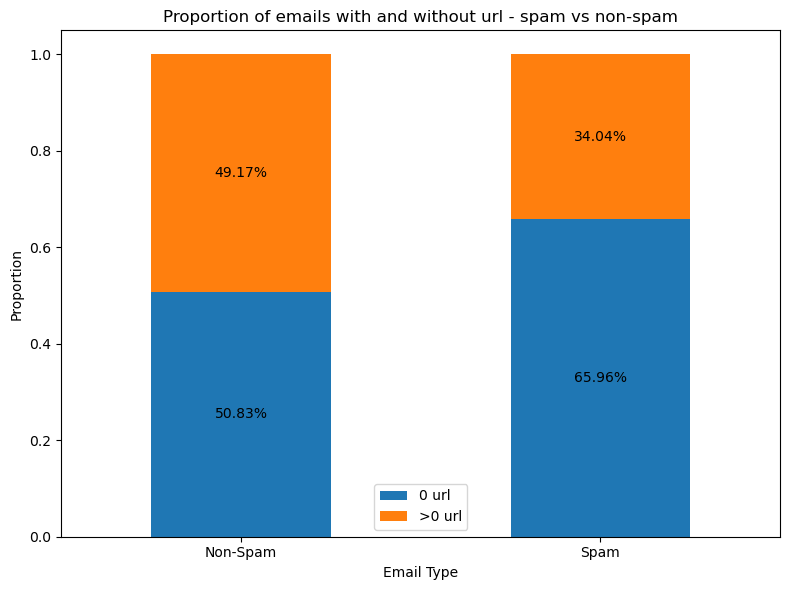

In [95]:
full_df['has_url'] = full_df['url_count'] > 0

# to plot stacked bar plot 
proportions = full_df.groupby('label')['has_url'].value_counts(normalize=True).unstack()
proportions.columns = ['0 url', '>0 url']

ax = proportions.plot(kind='bar', stacked=True, figsize=(8, 6), rot=0)
ax.set_xticklabels(['Non-Spam', 'Spam'])

# show percentage
for container in ax.containers:
    ax.bar_label(container, fmt='{:.2%}', label_type='center')

plt.title('Proportion of emails with and without url - spam vs non-spam')
plt.ylabel('Proportion')
plt.xlabel('Email Type')
plt.tight_layout()
plt.show()

In [96]:
import re
from urllib.parse import urlparse
import numpy as np

In [97]:
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'

def extract_url_features(text):
    urls = re.findall(url_pattern, text)
    num_urls = len(urls)
    features = {'num_urls': num_urls}

    if num_urls == 0:
        features['avg_url_length'] = 0
        features['max_url_length'] = 0
        features['domain_has_digits'] = 0 
        features['is_ip_url'] = 0
        return features

    total_len = 0
    max_len = 0
    domain_digits_count = 0
    ip_url_count = 0

    for url in urls:
        try:
            parsed = urlparse(url)
            netloc = parsed.netloc

            current_len = len(url)
            total_len += current_len
            if current_len > max_len:
                max_len = current_len

            # check if digits (numbers) are found in url
            if any(char.isdigit() for char in netloc):
                domain_digits_count += 1
            
            # check if url is ip address
            if re.match(r"^\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}$", netloc):
                 ip_url_count += 1

        except Exception: # Handle potential parsing errors for malformed URLs
            continue

    features['avg_url_length'] = total_len / num_urls if num_urls > 0 else 0
    features['max_url_length'] = max_len
    features['domain_has_digits'] = 1 if domain_digits_count > 0 else 0
    features['is_ip_url'] = 1 if ip_url_count > 0 else 0

    return features

In [98]:
training = pd.read_csv("../data/processed/training.csv")
testing = pd.read_csv("../data/processed/testing.csv")

In [99]:
temp_training = training.copy()
temp_testing = testing.copy()

training_urlfeatures = temp_training['body'].apply(lambda x: extract_url_features(x if isinstance(x, str) else ''))
testing_urlfeatures = temp_testing['body'].apply(lambda x: extract_url_features(x if isinstance(x, str) else ''))

train_url_features_df = pd.DataFrame(training_urlfeatures.tolist())
train_df_with_url_features = pd.concat([temp_training.reset_index(drop=True), train_url_features_df.reset_index(drop=True)], axis=1)

test_url_features_df = pd.DataFrame(testing_urlfeatures.tolist())
test_df_with_url_features = pd.concat([temp_testing.reset_index(drop=True), test_url_features_df.reset_index(drop=True)], axis=1)

In [100]:
pd.set_option('display.max_colwidth', None)
ip_urls_test = test_df_with_url_features[test_df_with_url_features['domain_has_digits'] == 1]
print(ip_urls_test[['body']].sample())  # sample to show domain with digits

In [101]:
pd.set_option('display.max_colwidth', None)
ip_urls_test = test_df_with_url_features[test_df_with_url_features['is_ip_url'] == 1]
print(ip_urls_test.loc[19236, 'body']) # from random sampling, found one with obvious ip url to visualise

  
  
![](http://65.162.84.5/images/max_showgirl_468.gif)  
  
---  
|

![](http://65.162.84.5/images/top-money.jpg)

|

![](http://65.162.84.5/images/logo_maxim.gif)

|

![](http://65.162.84.5/images/top-money.jpg)  
  
---|---|---  
  
> CLICK HERE TO GET YOUR FREE $500
>
> **$$$ Maxim Sportsbook and Casino are proud to announce that you get up to
> $500 with every new Casino and Sportsbook Account created $$$**
>
> **$$$ We will also honour a FREE 2-3 night vacation for you and a loved one.
> That's right!..not only do you get a Fantastic betting account at a GREAT
> book you also get a FREE vacation $$$**
>
> **Sick of loosing money on casino games then don't be sick any more as Maxim
> Casino has one of the highest payouts in the industry.**
>
> ![](http://65.162.84.5/images/money.jpg)

**MAXIM SPORTSBOOK AND CASINO**

CLICK HERE TO GET YOUR FREE VACATION  
  
This email is not sent unsolicited. You opted-in with CNN-SI. You are
receiving it because you requested to receive this e

Visualising url features - spam vs non-spam

In [102]:
import matplotlib.pyplot as plt

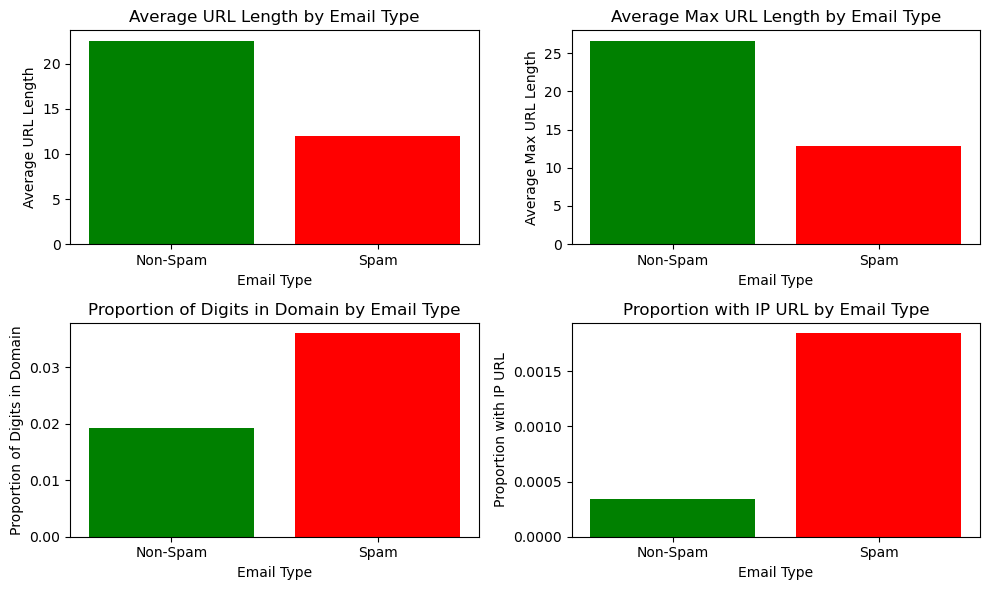

In [103]:
avg_url_lengths = train_df_with_url_features.groupby('label')['avg_url_length'].mean()
labels = ['Non-Spam', 'Spam']
avg_lengths = avg_url_lengths.values

max_url_lengths = train_df_with_url_features.groupby('label')['max_url_length'].mean()
avg_max_lengths = max_url_lengths.values

max_url_lengths_digits = train_df_with_url_features.groupby('label')['domain_has_digits'].mean()
avg_max_lengths_digits = max_url_lengths_digits.values

max_url_lengths_ip = train_df_with_url_features.groupby('label')['is_ip_url'].mean()
avg_max_lengths_ip = max_url_lengths_ip.values

# Create a 2x2 grid of plots with a smaller figure size
fig, axes = plt.subplots(2, 2, figsize=(10, 6))  # Adjusted to be smaller

# Plot 1: Average URL Length by Email Type
axes[0, 0].bar(labels, avg_lengths, color=['green', 'red'])
axes[0, 0].set_title('Average URL Length by Email Type')
axes[0, 0].set_ylabel('Average URL Length')
axes[0, 0].set_xlabel('Email Type')

# Plot 2: Average Max URL Length by Email Type
axes[0, 1].bar(labels, avg_max_lengths, color=['green', 'red'])
axes[0, 1].set_title('Average Max URL Length by Email Type')
axes[0, 1].set_ylabel('Average Max URL Length')
axes[0, 1].set_xlabel('Email Type')

# Plot 3: Proportion of Digits in Domain by Email Type
axes[1, 0].bar(labels, avg_max_lengths_digits, color=['green', 'red'])
axes[1, 0].set_title('Proportion of Digits in Domain by Email Type')
axes[1, 0].set_ylabel('Proportion of Digits in Domain')
axes[1, 0].set_xlabel('Email Type')

# Plot 4: Proportion with IP URL by Email Type
axes[1, 1].bar(labels, avg_max_lengths_ip, color=['green', 'red'])
axes[1, 1].set_title('Proportion with IP URL by Email Type')
axes[1, 1].set_ylabel('Proportion with IP URL')
axes[1, 1].set_xlabel('Email Type')

plt.tight_layout()
plt.show()

## Modelling
Baseline model: Logistic regression 

Preparing data to test for hypothesis through analysing model performance.

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

In [105]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack, csr_matrix

In [106]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def visualise_perf(y_true, y_pred, y_prob, title):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_prob)

    print(title)
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1 Score : {f1:.4f}")
    print(f"AUC      : {auc:.4f}")

    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Non-Spam', 'Spam'],
                yticklabels=['Non-Spam', 'Spam'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

Logistic Regression with URL Features Only
Accuracy : 0.5812
Precision: 0.5446
Recall   : 0.7034
F1 Score : 0.6139
AUC      : 0.6359


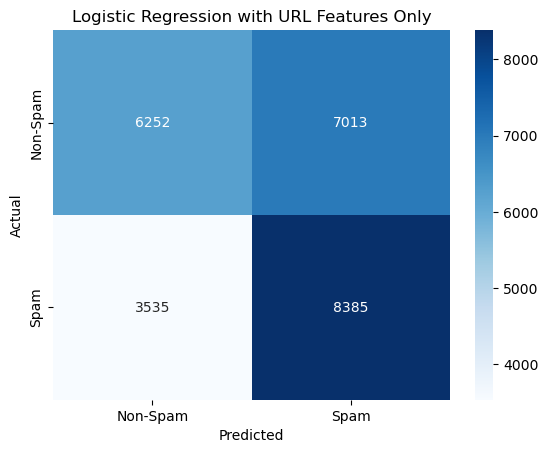

num_urls: -0.2774
avg_url_length: 0.0209
max_url_length: -0.0283
domain_has_digits: 1.6435
is_ip_url: 1.7956


In [107]:
X_train_url = train_df_with_url_features[url_features]
X_test_url = test_df_with_url_features[url_features]

log_reg_url = LogisticRegression(max_iter=1000, random_state=42)
log_reg_url.fit(X_train_url, y_train_temp)
y_pred_url = log_reg_url.predict(X_test_url)
y_prod_url = log_reg_url.predict_proba(X_test_url)[:, 1]
visualise_perf(y_test_temp, y_pred_url, y_prod_url, "Logistic Regression with URL Features Only")

url_coefficients = log_reg_url.coef_[0]
for feature, coef in zip(url_features, url_coefficients):
    print(f'{feature}: {coef:.4f}')

Model trained on just URL features performs rather poorly, with most non-spam emails wrongly classified as spam, and nearly 30% of spam wrongly classified as non-spam.

For further analysis, we attempt to run the features with Tf-Idf vectors.

In [108]:
vectorizer = TfidfVectorizer()  
X_train = vectorizer.fit_transform(train_df_with_url_features['tokens'])
X_test = vectorizer.transform(test_df_with_url_features['tokens'])

url_features = ['num_urls', 'avg_url_length', 'max_url_length', 'domain_has_digits', 'is_ip_url']
X_train_temp = csr_matrix(train_df_with_url_features[url_features].values)
X_test_temp = csr_matrix(test_df_with_url_features[url_features].values)

X_train_combined = hstack([X_train, X_train_temp])  
X_test_combined = hstack([X_test, X_test_temp])    

y_train_temp = train_df_with_url_features['label']
y_test_temp = test_df_with_url_features['label']

Logistic Regression without url features
Accuracy : 0.9786
Precision: 0.9771
Recall   : 0.9777
F1 Score : 0.9774
AUC      : 0.9974


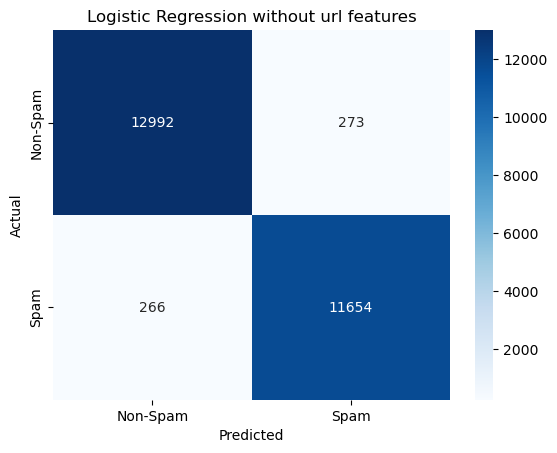

Logistic Regression with url features
Accuracy : 0.9785
Precision: 0.9790
Recall   : 0.9755
F1 Score : 0.9772
AUC      : 0.9975


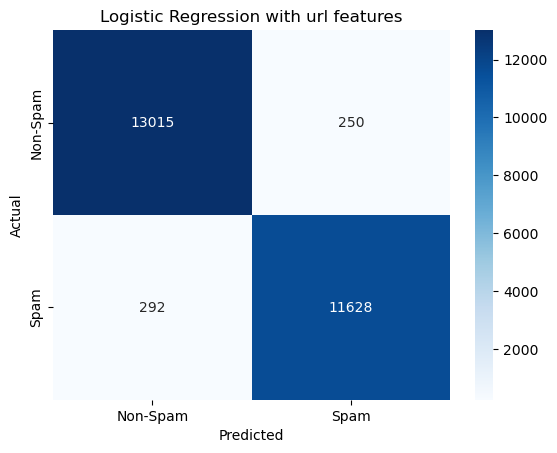

In [109]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train_temp)
y_pred = log_reg.predict(X_test)
y_prod = log_reg.predict_proba(X_test)[:, 1]
visualise_perf(y_test_temp, y_pred, y_prod, "Logistic Regression without url features")

log_reg2 = LogisticRegression(max_iter=1000, random_state=42)
log_reg2.fit(X_train_combined, y_train_temp)
y_pred2 = log_reg2.predict(X_test_combined)
y_prod2 = log_reg2.predict_proba(X_test_combined)[:, 1]
visualise_perf(y_test_temp, y_pred2, y_prod2, "Logistic Regression with url features")

In [110]:
coefficients = log_reg2.coef_[0]  
url_coefficients = coefficients[-5:]

for feature, coef in zip(url_features, url_coefficients):
    print(f"{feature}: {coef:.4f}")

num_urls: -0.1194
avg_url_length: 0.0116
max_url_length: -0.0216
domain_has_digits: 1.4773
is_ip_url: 0.9791


From the confusion matrics, we observe a slight improvement for the prediction of non-spam emails, with 23 more correctly classified as non-spam. However, we observe a drop in accuracy for spam, with 26 now classified wrongly as non-spam when URL features are considered.

Overall, it appears unlikely that URL features help improve model performance.